In [1]:
from Bio.PDB import PDBParser, Superimposer, PPBuilder
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# Load structures
parser = PDBParser(QUIET=True)
structure1 = parser.get_structure("pred", "../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb")
structure2 = parser.get_structure("wt", "../pdb/3PL1-PZA.pdb")

In [3]:
# Select atoms (e.g., CA atoms of the first chain)
def get_ca_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    return [res["CA"] for res in chain if "CA" in res][:185]

In [4]:
def get_all_atoms(structure):
    model = structure[0]  # First model
    chain = list(model.get_chains())[0]  # First chain
    atoms = []
    for residue in chain:
        if residue.id[0] == " ":  # Exclude heteroatoms and water
            for atom in residue:
                atoms.append(atom)
    return atoms[:1372]

In [5]:
atoms1 = get_ca_atoms(structure1)
atoms2 = get_ca_atoms(structure2)
# atoms1 = get_all_atoms(structure1)
# atoms2 = get_all_atoms(structure2)

In [6]:
len(atoms1), len(atoms2)

(185, 185)

In [7]:
# Superimpose and compute RMSD
sup = Superimposer()
sup.set_atoms(atoms1, atoms2)
sup.apply(structure2.get_atoms())  # Optional: apply transformation

print(f"RMSD: {sup.rms:.3f} Å")

RMSD: 0.475 Å


In [8]:
prefix = "021_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb".split('_')[0]
prefix

'021'

In [9]:
# wt = get_all_atoms(structure2)
wt = get_ca_atoms(structure2)


def get_rmsds(folder, wt_atoms):
    rmsds = {}
    files = [f for f in os.listdir(folder) if f.endswith('.pdb')]
    for file in files:
                
        atoms = get_ca_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        # atoms = get_all_atoms(parser.get_structure("pred", f"{folder}/{file}"))
        
        assert len(atoms) == len(wt_atoms)
        
        sup = Superimposer()
        sup.set_atoms(atoms, wt_atoms)
        # sup.apply(structure2.get_atoms())  # Optional: apply transformation

        sample = file.split('_')[0]
        
        rmsds[sample] = sup.rms
        
        print(f"RMSD: {sup.rms:.3f} Å")
        
    return rmsds

In [10]:
get_rmsds("../pdb/test_pza", wt)

RMSD: 0.497 Å
RMSD: 0.490 Å
RMSD: 0.459 Å
RMSD: 0.532 Å
RMSD: 0.507 Å
RMSD: 0.490 Å
RMSD: 0.485 Å
RMSD: 0.487 Å
RMSD: 0.489 Å
RMSD: 0.477 Å
RMSD: 0.564 Å
RMSD: 0.486 Å
RMSD: 0.511 Å
RMSD: 0.503 Å
RMSD: 0.538 Å
RMSD: 0.500 Å
RMSD: 0.502 Å
RMSD: 0.492 Å
RMSD: 0.493 Å
RMSD: 0.484 Å
RMSD: 0.498 Å
RMSD: 0.493 Å
RMSD: 0.486 Å
RMSD: 0.497 Å
RMSD: 0.493 Å
RMSD: 0.482 Å
RMSD: 0.492 Å
RMSD: 0.486 Å
RMSD: 0.486 Å
RMSD: 0.487 Å
RMSD: 0.514 Å
RMSD: 0.479 Å
RMSD: 0.505 Å
RMSD: 0.508 Å
RMSD: 0.493 Å
RMSD: 0.496 Å
RMSD: 0.499 Å
RMSD: 0.485 Å
RMSD: 0.493 Å
RMSD: 0.495 Å
RMSD: 0.487 Å
RMSD: 0.514 Å
RMSD: 0.493 Å
RMSD: 0.503 Å
RMSD: 0.495 Å
RMSD: 0.584 Å
RMSD: 0.486 Å
RMSD: 0.541 Å
RMSD: 0.504 Å
RMSD: 0.537 Å
RMSD: 0.491 Å
RMSD: 0.505 Å
RMSD: 0.483 Å
RMSD: 0.496 Å
RMSD: 0.504 Å
RMSD: 0.503 Å
RMSD: 0.618 Å
RMSD: 0.492 Å
RMSD: 0.507 Å
RMSD: 0.498 Å
RMSD: 0.503 Å
RMSD: 0.487 Å
RMSD: 0.479 Å
RMSD: 0.635 Å
RMSD: 0.543 Å
RMSD: 0.507 Å
RMSD: 0.484 Å
RMSD: 0.520 Å
RMSD: 0.495 Å
RMSD: 0.490 Å
RMSD: 0.484 Å
RMSD: 

{'99': 0.49709438937505196,
 '3': 0.4900354504336029,
 '188': 0.45925424593746433,
 '15': 0.5315926872896226,
 '142': 0.5068522653583384,
 '38': 0.49015004822212166,
 '150': 0.4847883476085291,
 '104': 0.48702789414037334,
 '53': 0.48865068148730656,
 '41': 0.476614121117224,
 '116': 0.564397413773667,
 '129': 0.4857969334427408,
 '197': 0.5112980644366065,
 '185': 0.5033587014413615,
 '86': 0.5376410600326564,
 '94': 0.5003895953477155,
 '61': 0.5020404886958106,
 '136': 0.4921621206923607,
 '109': 0.4930538559924083,
 '124': 0.4841290398473784,
 '73': 0.4977518924771181,
 '18': 0.4934463579792107,
 '33': 0.48555113184827037,
 '170': 0.49721429845752535,
 '27': 0.4928898162654769,
 '35': 0.4817145107551216,
 '162': 0.491606938308112,
 '13': 0.4855007543471039,
 '144': 0.4863744506569364,
 '169': 0.48734584521971547,
 '156': 0.5141233277612144,
 '102': 0.4785329239345213,
 '55': 0.5053395888115224,
 '47': 0.5080367737302645,
 '110': 0.49306154424726933,
 '78': 0.49634275948328194,
 '5'

In [11]:
get_rmsds("../pdb/train_pza", wt)

RMSD: 0.498 Å
RMSD: 0.486 Å
RMSD: 0.487 Å
RMSD: 0.480 Å
RMSD: 0.490 Å
RMSD: 0.486 Å
RMSD: 0.477 Å
RMSD: 0.499 Å
RMSD: 0.513 Å
RMSD: 0.493 Å
RMSD: 0.513 Å
RMSD: 0.505 Å
RMSD: 0.487 Å
RMSD: 0.448 Å
RMSD: 0.541 Å
RMSD: 0.535 Å
RMSD: 0.501 Å
RMSD: 0.490 Å
RMSD: 0.476 Å
RMSD: 0.514 Å
RMSD: 0.485 Å
RMSD: 0.513 Å
RMSD: 0.503 Å
RMSD: 0.468 Å
RMSD: 0.479 Å
RMSD: 0.508 Å
RMSD: 0.478 Å
RMSD: 0.477 Å
RMSD: 0.577 Å
RMSD: 0.503 Å
RMSD: 0.490 Å
RMSD: 0.495 Å
RMSD: 0.510 Å
RMSD: 0.489 Å
RMSD: 0.490 Å
RMSD: 0.458 Å
RMSD: 0.490 Å
RMSD: 0.462 Å
RMSD: 0.591 Å
RMSD: 0.505 Å
RMSD: 0.529 Å
RMSD: 0.483 Å
RMSD: 0.497 Å
RMSD: 0.503 Å
RMSD: 0.503 Å
RMSD: 0.489 Å
RMSD: 0.500 Å
RMSD: 0.480 Å
RMSD: 0.522 Å
RMSD: 0.498 Å
RMSD: 0.471 Å
RMSD: 0.485 Å
RMSD: 0.486 Å
RMSD: 0.497 Å
RMSD: 0.488 Å
RMSD: 0.495 Å
RMSD: 0.523 Å
RMSD: 0.564 Å
RMSD: 0.490 Å
RMSD: 0.481 Å
RMSD: 0.538 Å
RMSD: 0.486 Å
RMSD: 0.472 Å
RMSD: 0.497 Å
RMSD: 0.490 Å
RMSD: 0.463 Å
RMSD: 0.515 Å
RMSD: 0.492 Å
RMSD: 0.492 Å
RMSD: 0.497 Å
RMSD: 0.494 Å
RMSD: 

{'315': 0.49792748329450165,
 '99': 0.48586275333012857,
 '338': 0.4869701473375617,
 '307': 0.4802083201488109,
 '353': 0.4903138798036107,
 '341': 0.4862680383069194,
 '3': 0.47749288133599355,
 '188': 0.4991921109972293,
 '254': 0.5128821746096426,
 '15': 0.49336769408256315,
 '142': 0.5126704210660838,
 '447': 0.5049554423581502,
 '399': 0.4870129095195679,
 '455': 0.44836874180581426,
 '279': 0.5407110502621523,
 '38': 0.5352365516870315,
 '246': 0.5013703451594475,
 '150': 0.48963041478470914,
 '116': 0.4760125141493124,
 '110': 0.5142289158919258,
 '104': 0.4851358989556185,
 '53': 0.5125010601172916,
 '212': 0.5026461561184835,
 '401': 0.46839421622538285,
 '41': 0.47905571169145184,
 '200': 0.5081523466739198,
 '129': 0.47806248047452354,
 '413': 0.47702937200220874,
 '281': 0.5770647734762054,
 '197': 0.503206731112705,
 '361': 0.4896367933488953,
 '373': 0.49543181963640126,
 '293': 0.5102384746269713,
 '185': 0.48872594730253555,
 '318': 0.4902982633097032,
 '94': 0.4576353

In [12]:
get_rmsds("../pdb/wt", wt)

RMSD: 0.503 Å
RMSD: 0.503 Å


{'wt': 0.5028189072912281, 'af': 0.5028097475981759}

### check wt structure is actually wt

In [15]:
import MDAnalysis

protein_structure = MDAnalysis.Universe('../pdb/wt/af_wt.pdb')

In [16]:
af_seq = str(protein_structure.residues.sequence().seq)

In [17]:
wt_seq = "MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTAEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS"

In [18]:
wt_seq == af_seq

True

In [19]:
# test on mutated sequence

protein_structure = MDAnalysis.Universe('../pdb/test_pza/0_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb')
af_seq = str(protein_structure.residues[:186].sequence().seq)
af_seq

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


'MRALIIVDVQNDFCEGGSLAVTGGAALARAISDYLAEAADYHHVVATKDFHIDPGDHFSGTPDYSSSWPPHCVSGTPGADFHPSLDTSAIEAVFYKGAYTGAYSGFEGVDENGTPLLNWLRQRGVDEVDVVGIATDHCVRQTDEDAVRNGLATRVLVDLTAGVSADTTVAALEEMRTASVELVCSS'

In [20]:
wt_seq == af_seq

False

### repeat RMSD with AF wt

In [23]:
af_wt_struct = parser.get_structure("wt", '../pdb/wt/af_wt.pdb')
af_wt_atoms = get_ca_atoms(af_wt_struct)
print(len(af_wt_atoms))

185


In [24]:
test_rmsds = get_rmsds("../pdb/test_pza", af_wt_atoms)

RMSD: 0.066 Å
RMSD: 0.056 Å
RMSD: 0.152 Å
RMSD: 0.324 Å
RMSD: 0.077 Å
RMSD: 0.068 Å
RMSD: 0.202 Å
RMSD: 0.081 Å
RMSD: 0.074 Å
RMSD: 0.076 Å
RMSD: 0.376 Å
RMSD: 0.054 Å
RMSD: 0.068 Å
RMSD: 0.080 Å
RMSD: 0.162 Å
RMSD: 0.109 Å
RMSD: 0.050 Å
RMSD: 0.064 Å
RMSD: 0.073 Å
RMSD: 0.059 Å
RMSD: 0.056 Å
RMSD: 0.064 Å
RMSD: 0.145 Å
RMSD: 0.062 Å
RMSD: 0.068 Å
RMSD: 0.059 Å
RMSD: 0.054 Å
RMSD: 0.100 Å
RMSD: 0.082 Å
RMSD: 0.068 Å
RMSD: 0.133 Å
RMSD: 0.093 Å
RMSD: 0.069 Å
RMSD: 0.080 Å
RMSD: 0.063 Å
RMSD: 0.079 Å
RMSD: 0.047 Å
RMSD: 0.059 Å
RMSD: 0.045 Å
RMSD: 0.144 Å
RMSD: 0.097 Å
RMSD: 0.165 Å
RMSD: 0.054 Å
RMSD: 0.048 Å
RMSD: 0.057 Å
RMSD: 0.540 Å
RMSD: 0.084 Å
RMSD: 0.207 Å
RMSD: 0.128 Å
RMSD: 0.206 Å
RMSD: 0.064 Å
RMSD: 0.113 Å
RMSD: 0.108 Å
RMSD: 0.120 Å
RMSD: 0.044 Å
RMSD: 0.153 Å
RMSD: 0.319 Å
RMSD: 0.080 Å
RMSD: 0.112 Å
RMSD: 0.064 Å
RMSD: 0.087 Å
RMSD: 0.056 Å
RMSD: 0.070 Å
RMSD: 0.364 Å
RMSD: 0.234 Å
RMSD: 0.056 Å
RMSD: 0.082 Å
RMSD: 0.072 Å
RMSD: 0.039 Å
RMSD: 0.127 Å
RMSD: 0.070 Å
RMSD: 

In [25]:
train_rmsds = get_rmsds("../pdb/train_pza", af_wt_atoms)

RMSD: 0.045 Å


RMSD: 0.057 Å
RMSD: 0.086 Å
RMSD: 0.057 Å
RMSD: 0.059 Å
RMSD: 0.062 Å
RMSD: 0.077 Å
RMSD: 0.068 Å
RMSD: 0.114 Å
RMSD: 0.049 Å
RMSD: 0.135 Å
RMSD: 0.085 Å
RMSD: 0.066 Å
RMSD: 0.136 Å
RMSD: 0.278 Å
RMSD: 0.191 Å
RMSD: 0.061 Å
RMSD: 0.056 Å
RMSD: 0.204 Å
RMSD: 0.135 Å
RMSD: 0.072 Å
RMSD: 0.116 Å
RMSD: 0.045 Å
RMSD: 0.190 Å
RMSD: 0.082 Å
RMSD: 0.121 Å
RMSD: 0.073 Å
RMSD: 0.111 Å
RMSD: 0.321 Å
RMSD: 0.141 Å
RMSD: 0.085 Å
RMSD: 0.093 Å
RMSD: 0.077 Å
RMSD: 0.056 Å
RMSD: 0.071 Å
RMSD: 0.160 Å
RMSD: 0.066 Å
RMSD: 0.149 Å
RMSD: 0.300 Å
RMSD: 0.109 Å
RMSD: 0.180 Å
RMSD: 0.080 Å
RMSD: 0.046 Å
RMSD: 0.058 Å
RMSD: 0.107 Å
RMSD: 0.083 Å
RMSD: 0.092 Å
RMSD: 0.117 Å
RMSD: 0.399 Å
RMSD: 0.055 Å
RMSD: 0.174 Å
RMSD: 0.055 Å
RMSD: 0.049 Å
RMSD: 0.108 Å
RMSD: 0.056 Å
RMSD: 0.054 Å
RMSD: 0.192 Å
RMSD: 0.243 Å
RMSD: 0.203 Å
RMSD: 0.102 Å
RMSD: 0.273 Å
RMSD: 0.048 Å
RMSD: 0.107 Å
RMSD: 0.046 Å
RMSD: 0.065 Å
RMSD: 0.124 Å
RMSD: 0.109 Å
RMSD: 0.129 Å
RMSD: 0.076 Å
RMSD: 0.061 Å
RMSD: 0.042 Å
RMSD: 0.084 Å
RMSD: 

### Analyse RMSDs

In [26]:
test_df = pd.DataFrame(test_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
test_df.index = test_df.index.astype(int)
test_df.sort_index(inplace=True)

train_df = pd.DataFrame(train_rmsds.items(), columns=['Sample', 'RMSD']).set_index('Sample')
train_df.index = train_df.index.astype(int)
train_df.sort_index(inplace=True)

In [27]:
train_df.describe()

,RMSD
count,464.000000
mean,0.105008
std,0.068884
min,0.035670
25%,0.059812
50%,0.082174
75%,0.126391
max,0.465885


In [28]:
test_df.describe()

,RMSD
count,200.000000
mean,0.110784
std,0.085925
min,0.030654
25%,0.059968
50%,0.079540
75%,0.127130
max,0.539620


In [29]:
full_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_df.describe()

,RMSD
count,664.000000
mean,0.106748
std,0.074409
min,0.030654
25%,0.059818
50%,0.080798
75%,0.126709
max,0.539620


### Get phenotypes

In [30]:
train_seqs = pd.read_csv('../data/real_train_sequences.csv')
test_seqs = pd.read_csv('../data/real_test_sequences.csv')

In [31]:
train_seqs.phenotype_label

0      S
1      S
2      R
3      S
4      R
      ..
459    S
460    S
461    S
462    S
463    S
Name: phenotype_label, Length: 464, dtype: object

In [32]:
train_df = pd.merge(train_df, train_seqs['phenotype_label'], left_index=True, right_index=True)
test_df = pd.merge(test_df, test_seqs['phenotype_label'], left_index=True, right_index=True)

In [33]:
display(train_df[train_df['phenotype_label'] == 'R'].describe())
display(train_df[train_df['phenotype_label'] == 'S'].describe())

,RMSD
count,246.000000
mean,0.119247
std,0.068614
min,0.038990
25%,0.065983
50%,0.101779
75%,0.148868
max,0.465885


,RMSD
count,218.000000
mean,0.088939
std,0.065724
min,0.035670
25%,0.053650
50%,0.068236
75%,0.094058
max,0.398973


In [34]:
display(test_df[test_df['phenotype_label'] == 'R'].describe())
display(test_df[test_df['phenotype_label'] == 'S'].describe())

,RMSD
count,103.000000
mean,0.127118
std,0.092595
min,0.041159
25%,0.066364
50%,0.094677
75%,0.152333
max,0.539620


,RMSD
count,97.000000
mean,0.093439
std,0.074864
min,0.030654
25%,0.056384
50%,0.067617
75%,0.091190
max,0.397053


In [35]:
train_df['Dataset'] = 'Train Set'
test_df['Dataset'] = 'Test Set'

In [36]:
full_set_df = pd.concat([train_df, test_df]).reset_index(drop=True)
full_set_df

,RMSD,phenotype_label,Dataset
0,0.132045,S,Train Set
1,0.090405,S,Train Set
2,0.093664,R,Train Set
3,0.077379,S,Train Set
4,0.253758,R,Train Set
...,...,...,...
659,0.334187,R,Test Set
660,0.082294,S,Test Set
661,0.067970,S,Test Set
662,0.047777,S,Test Set


### Sort and choose VMD images by RMSD

In [37]:
display(train_df, test_df)

,RMSD,phenotype_label,Dataset
Sample,,,
0,0.132045,S,Train Set
1,0.090405,S,Train Set
2,0.093664,R,Train Set
3,0.077379,S,Train Set
4,0.253758,R,Train Set
...,...,...,...
459,0.313355,S,Train Set
460,0.067975,S,Train Set
461,0.078040,S,Train Set


,RMSD,phenotype_label,Dataset
Sample,,,
0,0.130500,R,Test Set
1,0.312247,S,Test Set
2,0.113245,R,Test Set
3,0.056384,S,Test Set
4,0.062978,S,Test Set
...,...,...,...
195,0.334187,R,Test Set
196,0.082294,S,Test Set
197,0.067970,S,Test Set


In [38]:
test_muts = pd.read_csv('../data/real_test_sequences.csv')[['phenotype_label', 'mutation']]
train_muts = pd.read_csv('../data/real_train_sequences.csv')[['phenotype_label', 'mutation']]

In [39]:
train_muts.reset_index().rename(columns={'index': 'Sample'})

,Sample,phenotype_label,mutation
0,0,S,A102V
1,1,S,A134D
2,2,R,A134P
3,3,S,A134S
4,4,R,A134V
...,...,...,...
459,459,S,Y34H
460,460,S,Y64N
461,461,S,Y95H
462,462,S,Y99C


In [40]:
train_df_w_mut = train_df.reset_index().merge(
    train_muts.reset_index().rename(columns={'index': 'Sample'}), on=['phenotype_label', 'Sample'])

test_df_w_mut = test_df.reset_index().merge(
    test_muts.reset_index().rename(columns={'index': 'Sample'}), on=['phenotype_label', 'Sample'])

In [41]:
train_df_w_mut.set_index('Sample', inplace=True)
test_df_w_mut.set_index('Sample', inplace=True)


In [42]:
full_set_df_w_mut = pd.concat([train_df_w_mut, test_df_w_mut]).reset_index()

In [43]:
full_set_df_w_mut.sort_values(by='RMSD', ascending=False, inplace=True)

In [44]:
display(full_set_df_w_mut.head(10))
display(full_set_df_w_mut.tail(10))

,Sample,RMSD,phenotype_label,Dataset,mutation
628,164,0.539620,R,Test Set,T142R
572,108,0.484756,R,Test Set,L172P
431,431,0.465885,R,Train Set,V180F
545,81,0.420554,R,Test Set,G97V
35,35,0.398973,S,Train Set,A39E
579,115,0.397053,S,Test Set,L35R
91,91,0.387320,S,Train Set,D40E
334,334,0.376910,S,Train Set,S185C
580,116,0.376015,S,Test Set,L35V
411,411,0.371025,R,Train Set,V131F


,Sample,RMSD,phenotype_label,Dataset,mutation
9,9,0.039887,S,Train Set,A152S
267,267,0.039259,S,Train Set,N112H
172,172,0.039088,S,Train Set,G60R
332,332,0.038990,R,Train Set,S179N
483,19,0.038981,S,Test Set,A79S
663,199,0.038383,S,Test Set,Y99F
85,85,0.037669,S,Train Set,D166H
120,120,0.037428,S,Train Set,E111K
356,356,0.035670,S,Train Set,S84C
604,140,0.030654,S,Test Set,Q141E


In [45]:
# steps

# get file names for top and bottom 10 RMSDs renders
# generate png images with labels with 'convert' :  Index - mutation - R/S - RMSD - train/test
# Colour each part of text label differently
# 'montage' : 5 columns 4 rows

In [78]:
for _, row in full_set_df_w_mut[:10].iterrows():
    sample = row['Sample']
    mutation = row['mutation']
    phenotype = row['phenotype_label']
    rmsd = row['RMSD']
    dataset = row['Dataset'].split()[0]
    # dataset = row['Dataset']
    
    label = f"{dataset} {sample}\n{mutation} - {phenotype} - {rmsd:.3f} Å"
    
    # # Create a simple plot with the label
    # plt.figure(figsize=(10, 2))
    # plt.text(0.5, 0.5, label, fontsize=12, ha='center', va='center')
    # plt.axis('off')
    
    # plt.show()
    
    print(label, '\n')

Test 164
T142R - R - 0.540 Å 

Test 108
L172P - R - 0.485 Å 

Train 431
V180F - R - 0.466 Å 

Test 81
G97V - R - 0.421 Å 

Train 35
A39E - S - 0.399 Å 

Test 115
L35R - S - 0.397 Å 

Train 91
D40E - S - 0.387 Å 

Train 334
S185C - S - 0.377 Å 

Test 116
L35V - S - 0.376 Å 

Train 411
V131F - R - 0.371 Å 



In [79]:
for _, row in full_set_df_w_mut.tail(10).iterrows():
    sample = row['Sample']
    mutation = row['mutation']
    phenotype = row['phenotype_label']
    rmsd = row['RMSD']
    dataset = row['Dataset'].split()[0]
    # dataset = row['Dataset']
    
    label = f"{dataset} {sample}\n{mutation} - {phenotype} - {rmsd:.3f} Å"
    
    # # Create a simple plot with the label
    # plt.figure(figsize=(10, 2))
    # plt.text(0.5, 0.5, label, fontsize=12, ha='center', va='center')
    # plt.axis('off')
    
    # plt.show()
    
    print(label, '\n')

Train 9
A152S - S - 0.040 Å 

Train 267
N112H - S - 0.039 Å 

Train 172
G60R - S - 0.039 Å 

Train 332
S179N - R - 0.039 Å 

Test 19
A79S - S - 0.039 Å 

Test 199
Y99F - S - 0.038 Å 

Train 85
D166H - S - 0.038 Å 

Train 120
E111K - S - 0.037 Å 

Train 356
S84C - S - 0.036 Å 

Test 140
Q141E - S - 0.031 Å 



In [46]:
import os

def rename_files(dataset):
    for file in os.listdir(f'../pdb/{dataset}_structures/renders'):
        if file.endswith('.png'):
            prefix = file.split('_')[0]
            
            # print(prefix)
            # print(f'changing ../pdb/{dataset}_structures/renders/{file} to ../pdb/{dataset}_structures/renders/{prefix}.png')
            
            os.rename(f'../pdb/{dataset}_structures/renders/{file}', f'../pdb/{dataset}_structures/renders/{prefix}.png')

In [47]:
# rename_files('train')

In [48]:
for _, row in full_set_df_w_mut.head(10).iterrows():
    number = row['Sample']
    folder = 'train_structures' if row['Dataset'] == 'Train Set' else 'test_structures'
    
    path = f'{folder}/renders/{number}.png'
    print('\\' + path + ' \\')

\test_structures/renders/164.png \
\test_structures/renders/108.png \
\train_structures/renders/431.png \
\test_structures/renders/81.png \
\train_structures/renders/35.png \
\test_structures/renders/115.png \
\train_structures/renders/91.png \
\train_structures/renders/334.png \
\test_structures/renders/116.png \
\train_structures/renders/411.png \


In [49]:
for _, row in full_set_df_w_mut.tail(10).iterrows():
    number = row['Sample']
    folder = 'train_structures' if row['Dataset'] == 'Train Set' else 'test_structures'
    
    path = f'{folder}/renders/{number}.png'
    print('\\' + path + ' \\')

\train_structures/renders/9.png \
\train_structures/renders/267.png \
\train_structures/renders/172.png \
\train_structures/renders/332.png \
\test_structures/renders/19.png \
\test_structures/renders/199.png \
\train_structures/renders/85.png \
\train_structures/renders/120.png \
\train_structures/renders/356.png \
\test_structures/renders/140.png \


## Figures

In [196]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.dpi'] = 300

### Distribution of RMSDs for S and R

Not normal distribution; Mann-Whitney U test

In [50]:
# # Check distribution of RMSD values for S and R phenotypes

# plt.figure(figsize=(8, 6))

# sns.histplot(full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD'], binwidth=0.01, kde=True, color='mediumseagreen', alpha=0.4, 
#              binrange=(0.02, 0.55)
#              )
# sns.histplot(full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD'], binwidth=0.01, kde=True, color='indianred', alpha=0.4, 
#              binrange=(0.02, 0.55)
#              )

# plt.show()

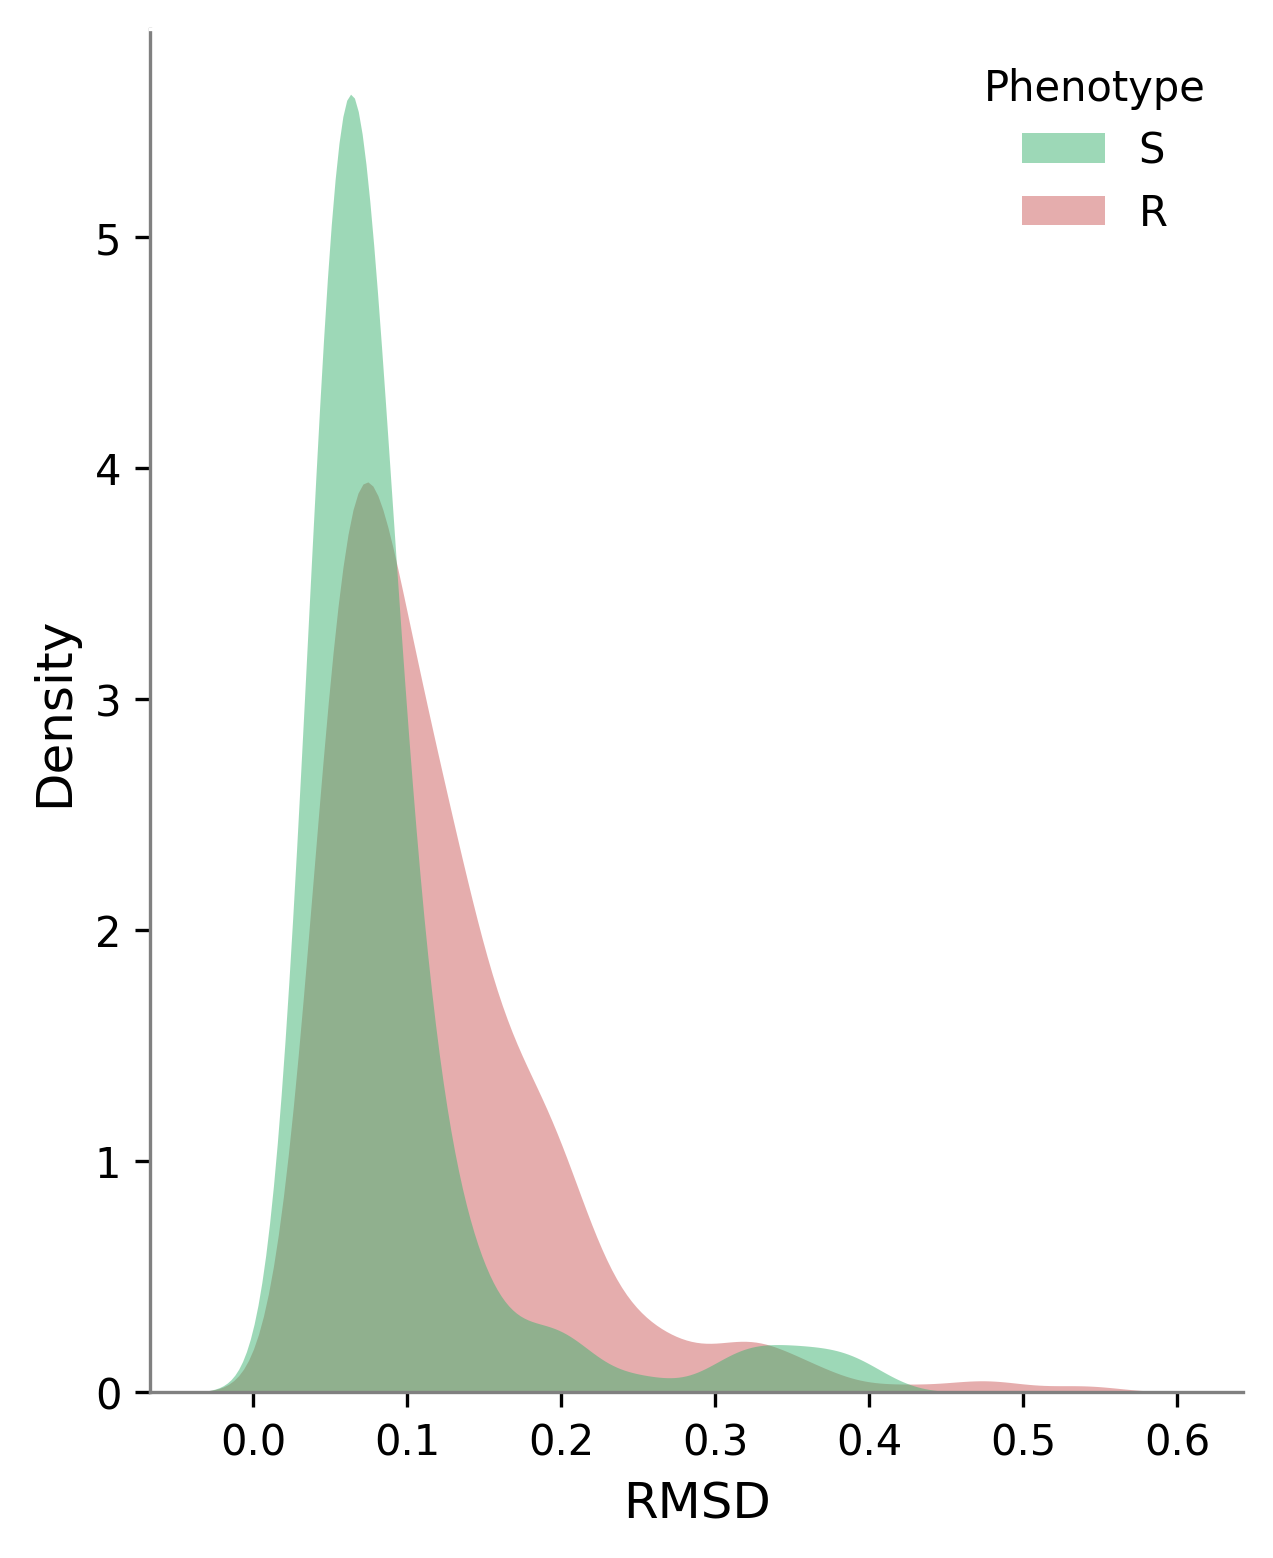

In [ ]:
from matplotlib.patches import Patch

# plt.figure(figsize=(8, 6))
# plt.figure(figsize=(4.7, 5.9))

data = full_set_df[['phenotype_label', 'RMSD']].rename(columns={'phenotype_label': 'Phenotype'})

# Define custom legend handles
legend_elements = [
    Patch(facecolor='mediumseagreen', edgecolor='none', label='S', alpha= 0.5),
    Patch(facecolor='indianred', edgecolor='none', label='R', alpha= 0.5)
]

# Create plot (or not—this works standalone)
fig, ax = plt.subplots(figsize=(4.7, 5.9))

# sns.kdeplot(full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD'], color='mediumseagreen', label='S')
# sns.kdeplot(full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD'], color='indianred', label='R')
sns.kdeplot(data, x='RMSD', 
            # multiple='stack', 
            hue='Phenotype',
            palette={'S': 'mediumseagreen', 'R': 'indianred'},
            fill=True,
            common_norm=True,
            linewidth=0,
            alpha=0.5
            )

# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# legend = plt.legend(title='Phenotype', loc='upper right', frameon=False)

# Manually add legend
legend = ax.legend(
    handles=legend_elements,
    title='Phenotype',
    frameon=False,     # Optional: True for border, False to remove
    loc='upper right' # Or whatever position you prefer
)

plt.xlabel('RMSD')
plt.ylabel('Density')
# plt.title('KDE of RMSD Values for S and R Phenotypes')

# plt.savefig('figs/kde_rmsd_s_r_v2.png', dpi=300, bbox_inches='tight')

plt.show()

### Boxplot of RMSDs

Show full dataset
Train
Test
All susceptible
All resistant

In [52]:
from scipy.stats import mannwhitneyu, ttest_ind

# test significance of RMSD differences between S and R

group1 = full_set_df[full_set_df['phenotype_label'] == 'S']['RMSD']
group2 = full_set_df[full_set_df['phenotype_label'] == 'R']['RMSD']

# stat, p_value = ttest_ind(group1, group2)
res = mannwhitneyu(group1, group2)

print(f"p = {res[1]}") # probability of observing a difference as large, assuming the null hypothesis (both groups have the same distribution) is true

p = 3.026279670338045e-15


/var/folders/l5/vrm1h_ss1_l4hs0jcrxrr_0c0000gn/T/ipykernel_29246/2211678223.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,


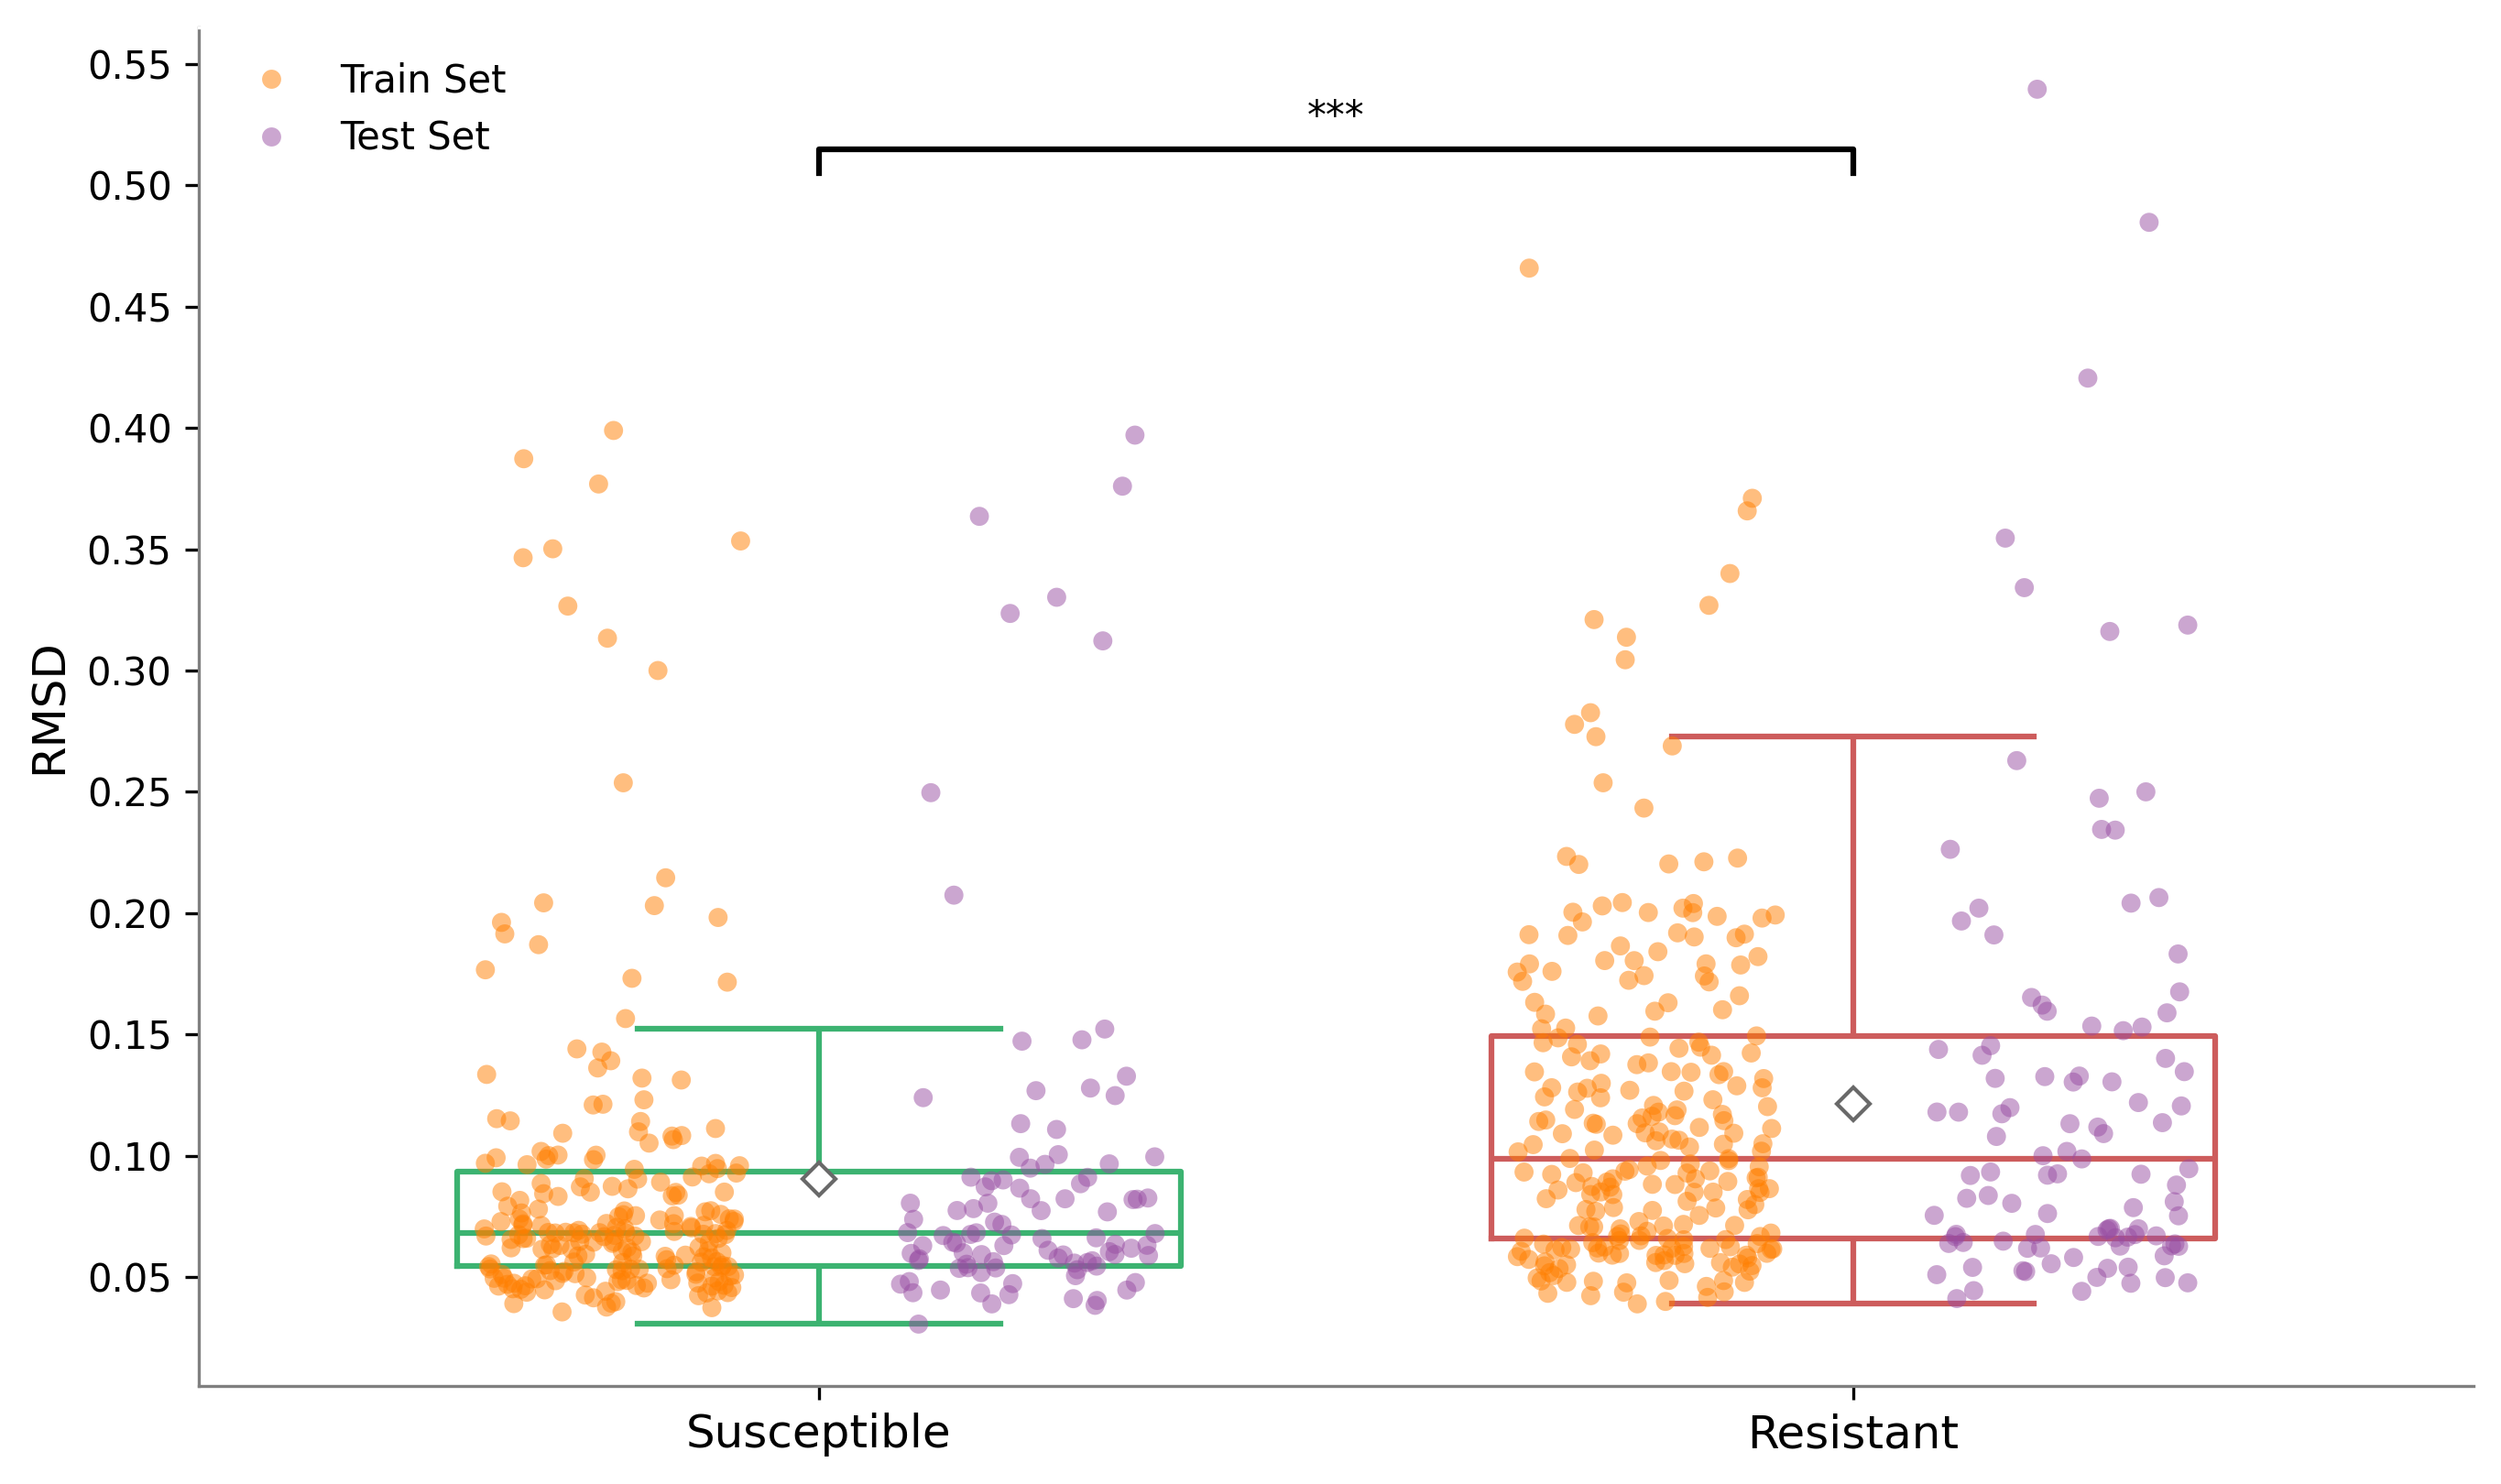

In [ ]:
# plt.figure(figsize=(6.5, 6))
plt.figure(figsize=(9.2, 5.5))

palette = {'S': 'mediumseagreen', 'R': 'indianred'}
# dot_palette = {'Train Set': 'yellowgreen', 'Test Set': 'peru'}
dot_palette = {'Train Set': '#ff7f00', 'Test Set': '#984ea3'}


sns.boxplot(data=full_set_df, x='phenotype_label', y='RMSD', palette=palette, showmeans=True,
            width=0.7,
            fill=False,
            meanprops={'marker':'D', 'markerfacecolor':'white',
                       'markeredgecolor':'dimgray', 'linestyle':'--'},
            showfliers=False,
        #     boxprops={'edgecolor': 'white'},
            # medianprops={
                # 'color': 'whitesmoke', 
                # 'linewidth': 1.5
                # },
        #     whiskerprops={'color': 'gray'},
            )


# Add jittered dots, colored by 'Category'
sns.stripplot(data=full_set_df, x='phenotype_label', y='RMSD', hue='Dataset', palette=dot_palette,
              dodge=True, jitter=0.25, 
              alpha=0.5, 
              size=5)

plt.yticks(np.arange(0, 0.6, 0.05))
plt.xticks(ticks=[0, 1], labels=['Susceptible', 'Resistant'], fontsize = 12)

plt.xlim(-0.6, 1.6)

# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


# Coordinates for annotation
x1, x2 = 0, 1   # 'S' and 'R'
# y, h, col = full_set_df['RMSD'].max() + 0.02, 0.01, 'black'
y, h, col = 0.505, 0.01, 'black'

# Draw line and p-value
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h+0.005, f"p = {res[1]}", ha='center', va='bottom', color=col)
plt.text((x1+x2)*.5, y+h+0.005, "***", ha='center', va='bottom', color=col)

# Add gridlines
# plt.grid(color='#f0f0f0', 
#         #  linestyle='--', 
#          linewidth=0.5, 
#          axis='y'
#          )


# Clean up legend
legend = plt.legend(title='',
        #    bbox_to_anchor=(1, 1), 
           loc='upper left'
           )

legend.set_frame_on(False)

# plt.title('RMSD by Phenotype for all AlphaFold Predicted Structures', fontsize = 14)

plt.xlabel('')
plt.ylabel('RMSD')

plt.tight_layout()

# plt.savefig("figs/af_struct_rmsd_boxplot_v4.png", dpi=300, bbox_inches='tight')

plt.show()


### RMSD by mutation position

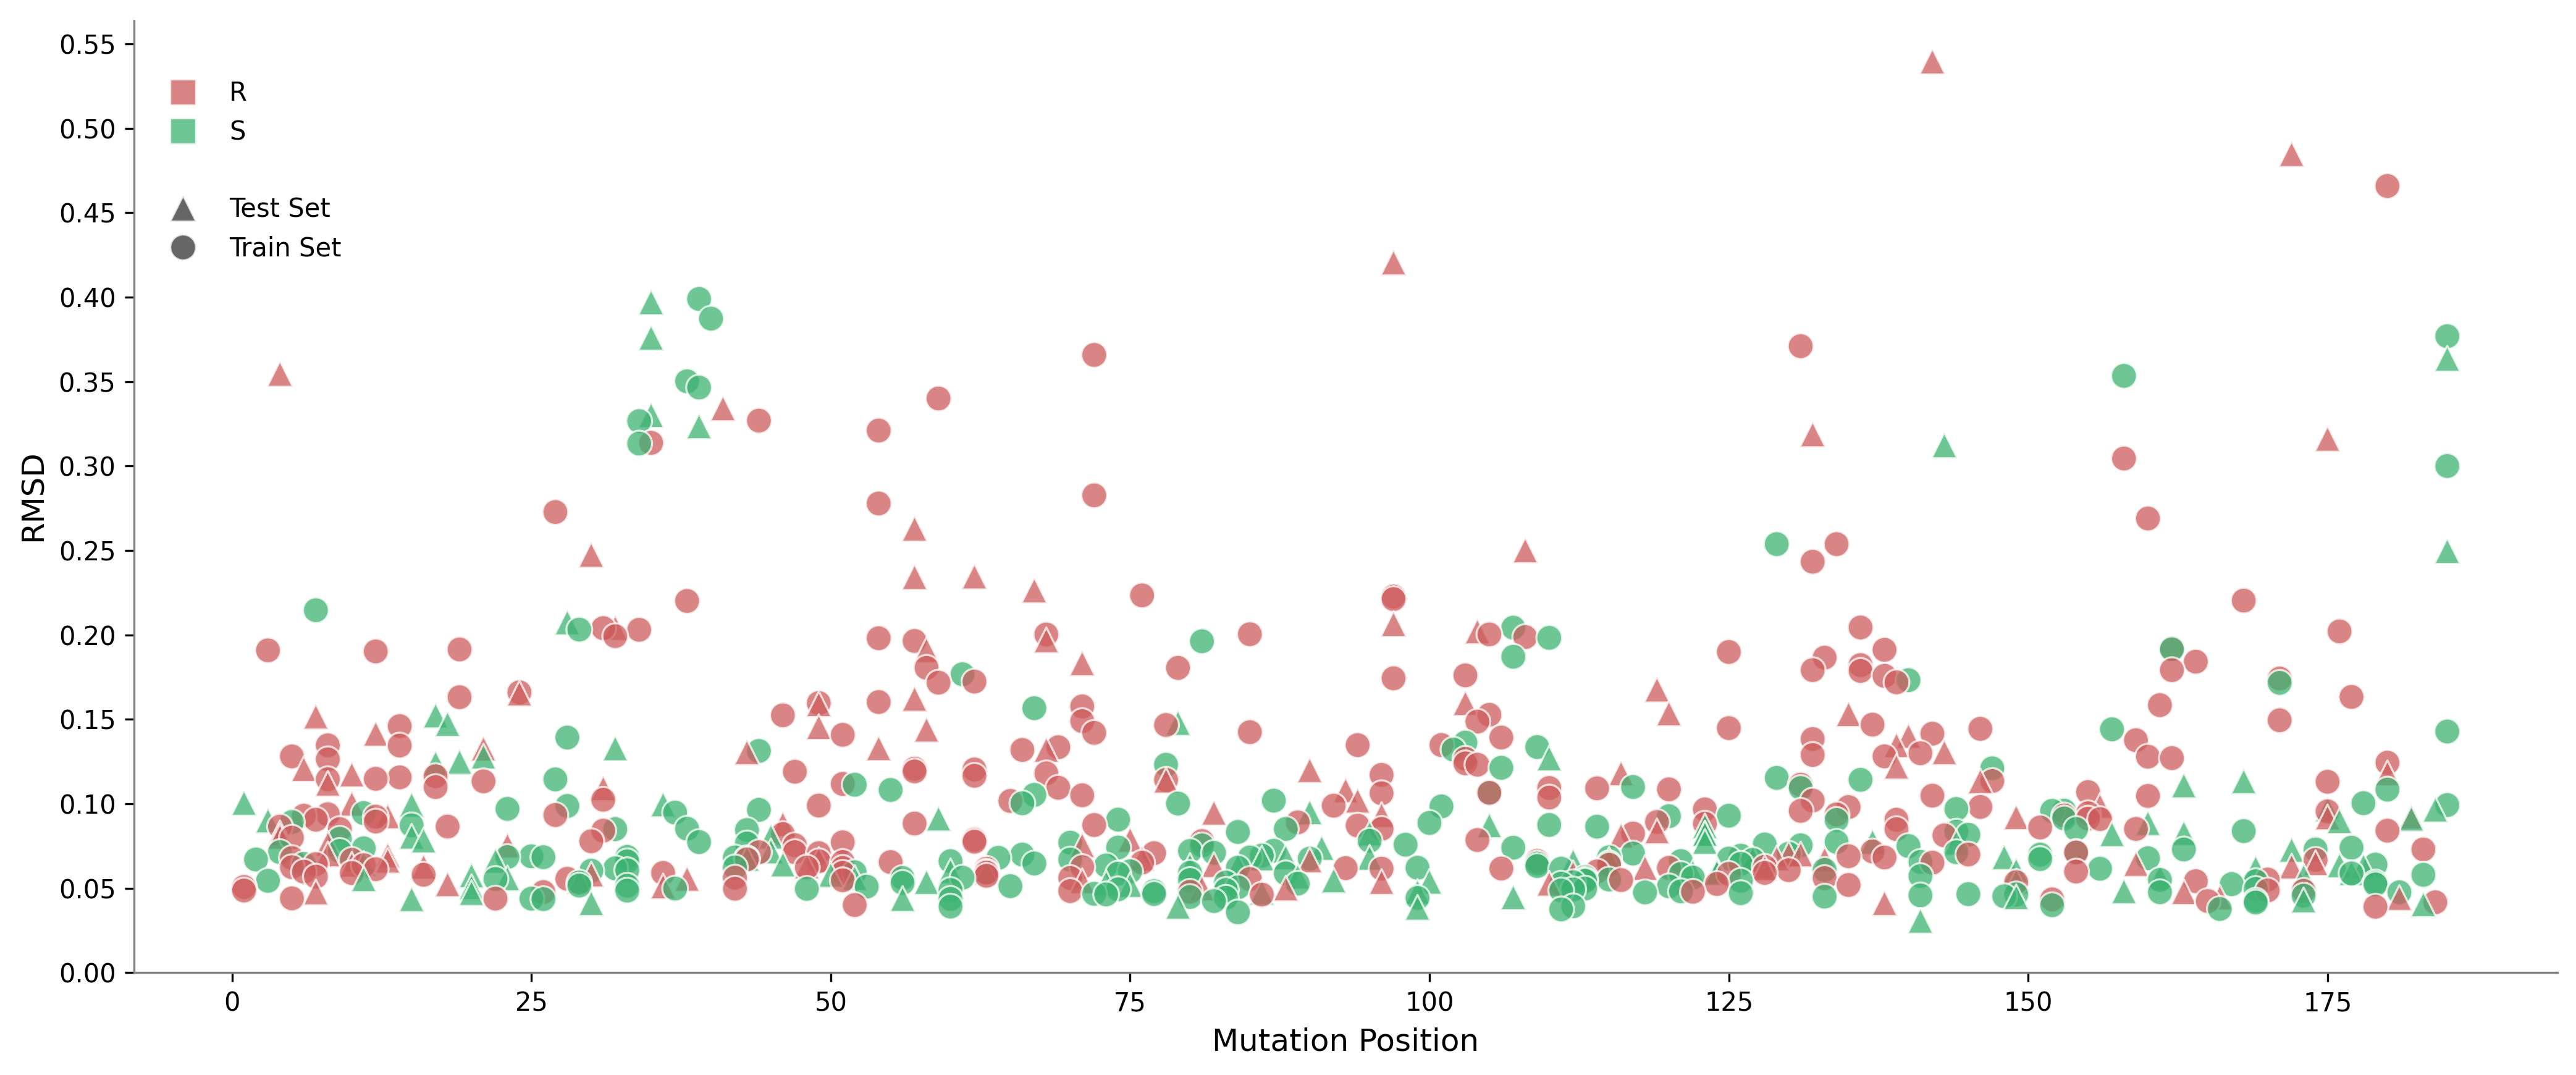

In [206]:
full_set_df_w_mut['mutation_position'] = full_set_df_w_mut['mutation'].str[1:-1].astype(int) # get mutation position

# plt.figure(figsize=(10, 6))
plt.figure(figsize=(14, 5.9))

sns.scatterplot(
    data=full_set_df_w_mut, 
    x='mutation_position', 
    y='RMSD', 
    hue='phenotype_label', 
    style='Dataset', 
    markers={'Train Set': 'o', 'Test Set': '^'}, 
    s=100, 
    palette={'S': 'mediumseagreen', 'R': 'indianred'},
    alpha=0.75,
    )

plt.yticks(ticks=np.arange(0, 0.6, 0.05))
plt.xlabel('Mutation Position')
plt.ylabel('RMSD')
# plt.title('RMSD vs Mutation Position')

# legend = plt.legend(title='Phenotype / Dataset')
legend = plt.legend(title='')
legend.set_frame_on(False)
legend.get_texts()[0].set_text('Phenotype')
legend.get_texts()[0].set_visible(False)
legend.get_texts()[3].set_visible(False)


legend.legend_handles[0].set_visible(False)
for handle in legend.legend_handles[1:3]:
    handle.set_marker('s')  # square marker type


# Change figure outline color
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


plt.tight_layout()

# plt.savefig("figs/rmsd_vs_mutation_position_v2.png", dpi=300, bbox_inches='tight')

plt.show()